# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# In order to perform a weather check on each city,
# we need to run a for loop which will irritate through the list and store the values in a lists
# Let us create empty lists first that will be used to store the data
# As shown in the output above, our Processing Records should be split in different sets
# Each set containing maximum of 49 entries.

city_name_ar = []
cloudiness_ar = []
country_ar = []
date_ar = []
humidity_ar = []
lat_ar = []
lng_ar = []
max_temp_ar = []
wind_speed_ar = []
index_counter = 0
set_counter = 1


print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name_ar.append(response["name"])
        cloudiness_ar.append(response["clouds"]["all"])
        country_ar.append(response["sys"]["country"])
        date_ar.append((datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y'))
        humidity_ar.append(response["main"]["humidity"])
        lat_ar.append(response["coord"]["lat"])
        lng_ar.append(response["coord"]["lon"])
        max_temp_ar.append(response['main']['temp_max'])
        wind_speed_ar.append(response["wind"]["speed"])
        if index_counter > 48:
            index_counter = 0
            set_counter +=1
    
        else:
            index_counter +=1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | maumere
Processing Record 2 of Set 1 | tautira
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | sur
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | clyde river
City not found. Skipping...
Processing Record 9 of Set 1 | okhansk
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | raudeberg
Processing Record 12 of Set 1 | le port
Processing Record 13 of Set 1 | longyearbyen
City not found. Skipping...
Processing Record 14 of Set 1 | flinders
Processing Record 15 of Set 1 | sitka
Processing Record 16 of Set 1 | nata
Processing Record 17 of Set 1 | akyab
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | ranong
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | yining
City not found. Skipping...
Processing Record 22 

Processing Record 35 of Set 4 | tshikapa
Processing Record 36 of Set 4 | kuching
Processing Record 37 of Set 4 | kosh-agach
Processing Record 38 of Set 4 | shenzhen
Processing Record 39 of Set 4 | atikokan
Processing Record 40 of Set 4 | kahului
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | tuatapere
Processing Record 43 of Set 4 | moses lake
Processing Record 44 of Set 4 | alofi
Processing Record 45 of Set 4 | delcevo
Processing Record 46 of Set 4 | port moresby
Processing Record 47 of Set 4 | kumluca
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | badiraguato
Processing Record 0 of Set 5 | kargil
Processing Record 1 of Set 5 | virginia beach
Processing Record 2 of Set 5 | verkhnevilyuysk
Processing Record 3 of Set 5 | palora
Processing Record 4 of Set 5 | sinegorskiy
Processing Record 5 of Set 5 | horodnytsya
Processing Record 6 of Set 5 | kirakira
Processing Record 7 of Set 5 | bereda
Processing Record 8 of Set 5 | biltine
Proc

Processing Record 30 of Set 8 | popondetta
Processing Record 31 of Set 8 | langenburg
Processing Record 32 of Set 8 | pangody
Processing Record 33 of Set 8 | batagay
Processing Record 34 of Set 8 | tayshet
Processing Record 35 of Set 8 | flin flon
Processing Record 36 of Set 8 | seydi
Processing Record 37 of Set 8 | bandarbeyla
Processing Record 38 of Set 8 | egvekinot
Processing Record 39 of Set 8 | gizo
Processing Record 40 of Set 8 | pyryatyn
Processing Record 41 of Set 8 | shache
Processing Record 42 of Set 8 | berlevag
Processing Record 43 of Set 8 | walvis bay
Processing Record 44 of Set 8 | lianzhou
Processing Record 45 of Set 8 | luau
Processing Record 46 of Set 8 | lahij
Processing Record 47 of Set 8 | saint-pierre
Processing Record 48 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 49 of Set 8 | ptichye
Processing Record 0 of Set 9 | tete
Processing Record 1 of Set 9 | sao filipe
Processing Record 2 of Set 9 | evensk
Processing Record 3 of Set 9 | tumaco
City not found

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Now we can create a dataframe with the information we populated above

city_data = pd.DataFrame({ 
                "City" : city_name_ar,
                "Lat" : lat_ar,
                "Lng" : lng_ar,
                "Max Temp" : max_temp_ar,
                "Humidity" : humidity_ar,
                "Cloudiness" : cloudiness_ar,
                "Wind Speed" : wind_speed_ar,
                "Country" : country_ar,
                "Date" : date_ar            
})

# Let's do a count on the newely created dataframe

city_data.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Let's take a look at first 5 entries in our city_weather dataframe

city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maumere,-8.62,122.21,79.86,71,83,3.80,ID,06/21/20
1,Tautira,-17.73,-149.15,84.20,62,75,5.82,PF,06/21/20
2,Rikitea,-23.12,-134.97,70.79,68,86,18.01,PF,06/21/20
3,Sur,22.57,59.53,85.53,68,58,9.26,OM,06/21/20
4,Ancud,-41.87,-73.82,48.00,100,90,16.11,CL,06/21/20


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Let's check what is the maximum humidity in our dataframe.
# If the maximum humidity is more than 100, then we'll remove that row from our dataframe

city_data['Humidity'].max()

100

In [7]:
# Let's be absolutely certain that there are no cities with humudity more than 100
# If we get an empty dataframe, then there are no cities with humudity more than 100

clean_city_data = city_data[city_data['Humidity']>100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Let's get the stats on our dataframe by performing the describe method

city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,21.435319,21.198528,67.858652,70.104610,44.537234,7.631915
std,32.991081,91.335763,14.154198,20.887622,36.717544,5.070656
min,-54.800000,-179.170000,35.010000,6.000000,0.000000,0.430000
25%,-5.905000,-58.935000,57.200000,59.750000,5.000000,3.610000
50%,26.550000,25.810000,69.645000,75.000000,40.000000,6.645000
75%,49.382500,101.447500,79.062500,86.000000,75.000000,10.290000
max,78.220000,179.320000,108.000000,100.000000,100.000000,27.070000


In [9]:
# Export the City_Data into a csv

city_data.to_csv(output_data_file, index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

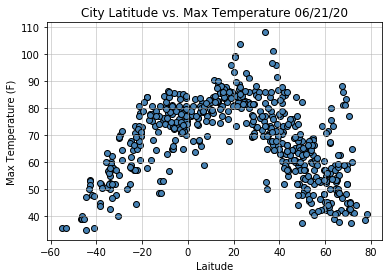

In [10]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")

plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {city_data['Date'][0]}")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("output_data/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

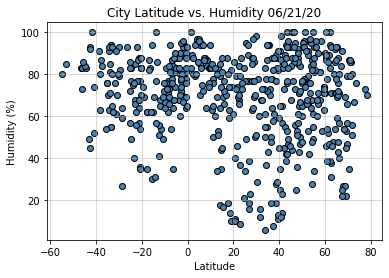

In [11]:
plt.scatter(city_data["Lat"], city_data["Humidity"], facecolor = "steelblue", edgecolor = "black")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {city_data['Date'][0]}")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("output_data/City Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

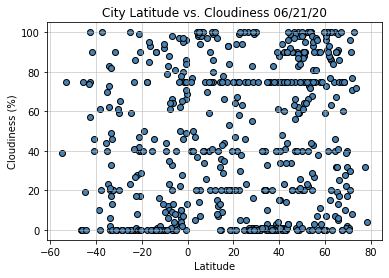

In [12]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {city_data['Date'][0]}")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("output_data/City Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

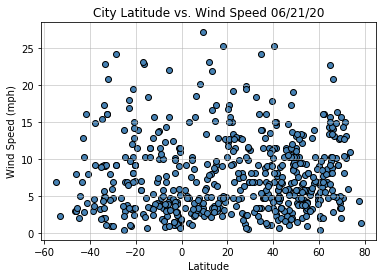

In [13]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {city_data['Date'][0]}")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Let us create a Linear Regression function which can be called later on

def linear_regression(x, b):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, b)
    print(f"The r-squared is: {rvalue**2}")
    regress_values = slope * x + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x, b)
    plt.plot(x, regress_values, "-r")
    return line_eq

In [15]:
# Create Northern and Southern Hemisphere DataFrames

In [15]:
northern_hemisphere = city_data.loc[city_data["Lat"] >= 0]
southern_hemisphere = city_data.loc[city_data["Lat"] < 0]

In [16]:
# Let's have a look at northern_hemisphere dataframe

northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Sur,22.57,59.53,85.53,68,58,9.26,OM,06/21/20
5,Pevek,69.70,170.31,45.00,79,17,2.01,RU,06/21/20
6,Talnakh,69.49,88.40,59.00,47,2,15.66,RU,06/21/20
7,Clyde River,70.47,-68.59,42.80,87,1,4.70,CA,06/21/20
8,Okhansk,57.72,55.39,46.40,81,75,6.71,RU,06/21/20


In [17]:
# Let's have a look at southern_hemisphere dataframe

southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maumere,-8.62,122.21,79.86,71,83,3.80,ID,06/21/20
1,Tautira,-17.73,-149.15,84.20,62,75,5.82,PF,06/21/20
2,Rikitea,-23.12,-134.97,70.79,68,86,18.01,PF,06/21/20
4,Ancud,-41.87,-73.82,48.00,100,90,16.11,CL,06/21/20
9,Puerto Ayora,-0.74,-90.35,70.00,93,66,1.01,EC,06/21/20


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4935511474667381


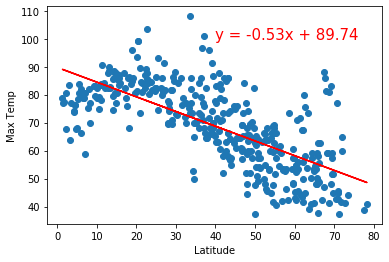

In [18]:
eq_1 = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(eq_1, (40,100), fontsize=15, color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6434809276630028


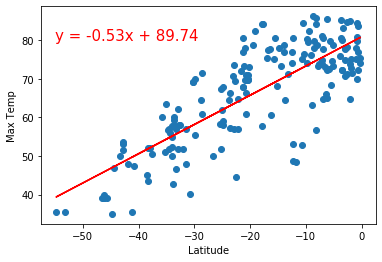

In [19]:
eq_2 = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(eq_1, (-55,80), fontsize=15, color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0006956931942830147


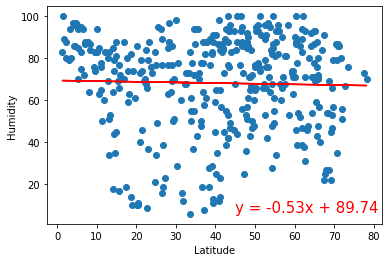

In [20]:
eq_3 = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(eq_1, (45,7), fontsize=15, color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.0089608442204036e-05


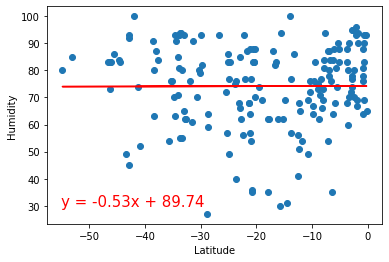

In [22]:
eq_4 = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(eq_1, (-55,30), fontsize=15, color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.001982493471801936


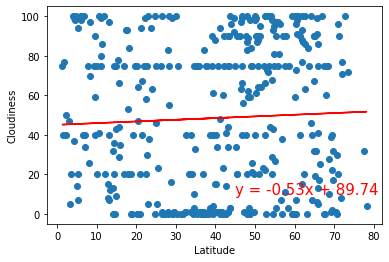

In [23]:
eq_5 = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(eq_1, (45,10), fontsize=15, color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003409889364023915


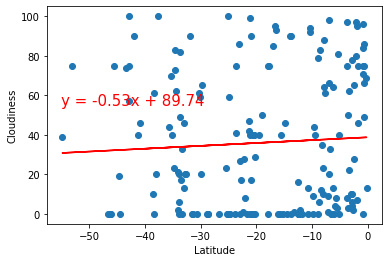

In [24]:
eq_6 = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(eq_1, (-55,55), fontsize=15, color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00027241207357450286


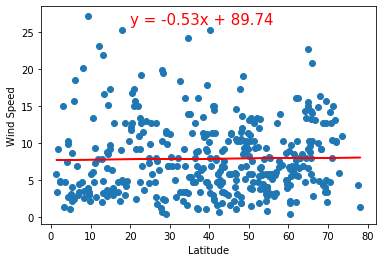

In [25]:
eq_7 = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(eq_1, (20,26), fontsize=15, color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01084918260252865


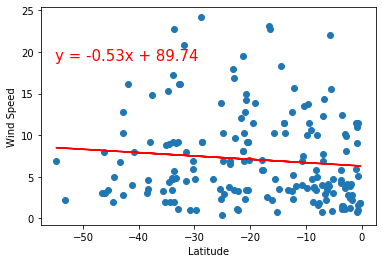

In [26]:
eq_8 = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(eq_1, (-55,19), fontsize=15, color="red")
plt.show()